# XgBoost
- First a base model is established for all the dataset.
- Log Odds -> log(positive_class / negative_class)
- Sigmoid_Func(Log_Odds)
- Gradient -> Birinci Türev Bilgisi -> Hatanın Büyüklüğünü
- Hassien -> İkinci Türev Bilgisi -> Hatanın Değişim Hızını gösterir
- Gradient ve Hassien modelin daha kararlı ve dengeli olmasını sağlar 



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sys 
import warnings 

%matplotlib inline
sys.path.append('/Users/user/Desktop/Projects/data-science/utils')
warnings.filterwarnings(action="ignore")


In [2]:
from SetupDataFrame import SetupDataFrame
from AnalyzeDataFrame import AnalyzeDataFrame
from VisualizeDataFrame import VisualizeDataFrame
from EvalModel import EvalModel
from HyperParameterTuning import HyperParameterTuning
from PreprocessDataFrame import PreprocessDataFrame

In [3]:
setup_df         =   SetupDataFrame()
analyze_df       =   AnalyzeDataFrame()
visualize_df     =   VisualizeDataFrame()
eval_model       =   EvalModel()
hp_tuning_model  =   HyperParameterTuning()
preprocess_model =   PreprocessDataFrame()

In [5]:
df = setup_df.setup_ml("20-digitalskysurvey.csv")

In [6]:
analyze_df.check_df(df)

***************************************** SHAPE ******************************************
(10000, 18)
***************************************** TYPES ******************************************
objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object
****************************************** HEAD ******************************************
          objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   

In [7]:
analyze_df.analyze_df(df)

**************************************** COLUMNS *****************************************
Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')
**************************************** DF INFO *****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field

In [8]:
cat_cols, num_cols, _ = analyze_df.grab_col_names(df)

Observations: 10000
Variables: 18
cat_cols: 4
num_cols: 14
cat_but_car: 0
num_but_cat: 3

Categorical Cols: ['class', 'objid', 'rerun', 'camcol']

Numerical Cols: ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'field', 'specobjid', 'redshift', 'plate', 'mjd', 'fiberid']

Categorical but cardinal Cols: []


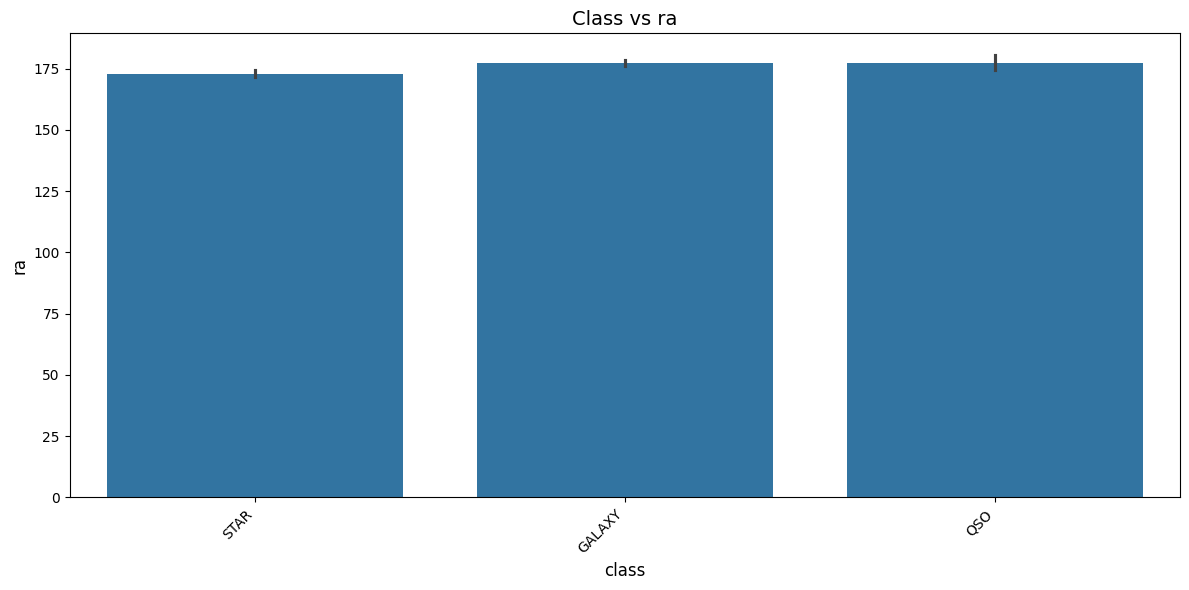

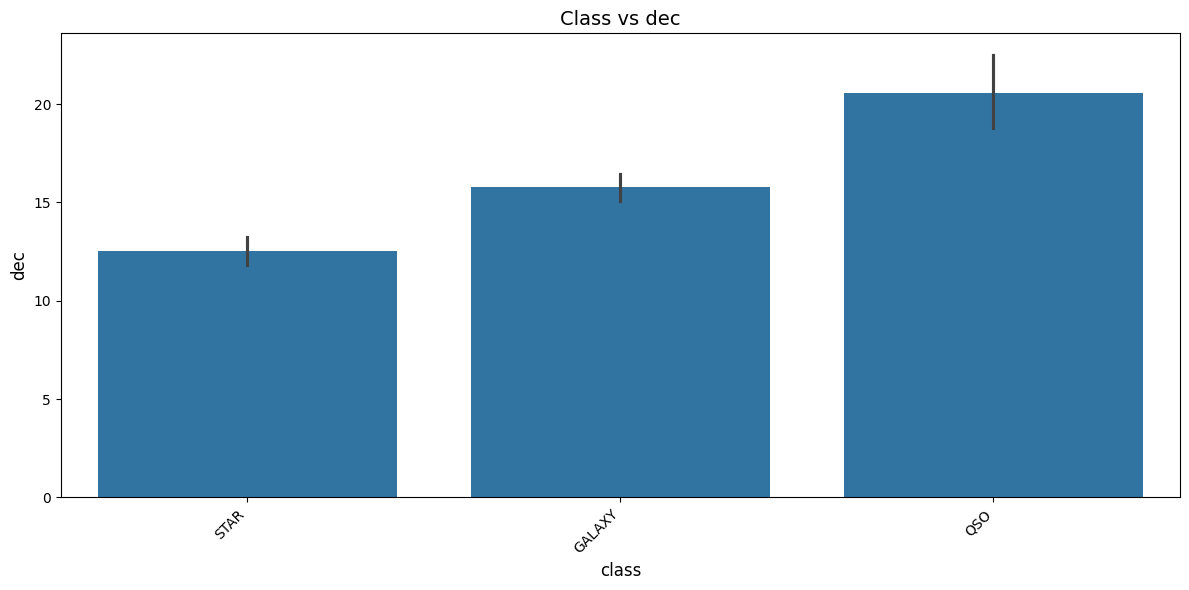

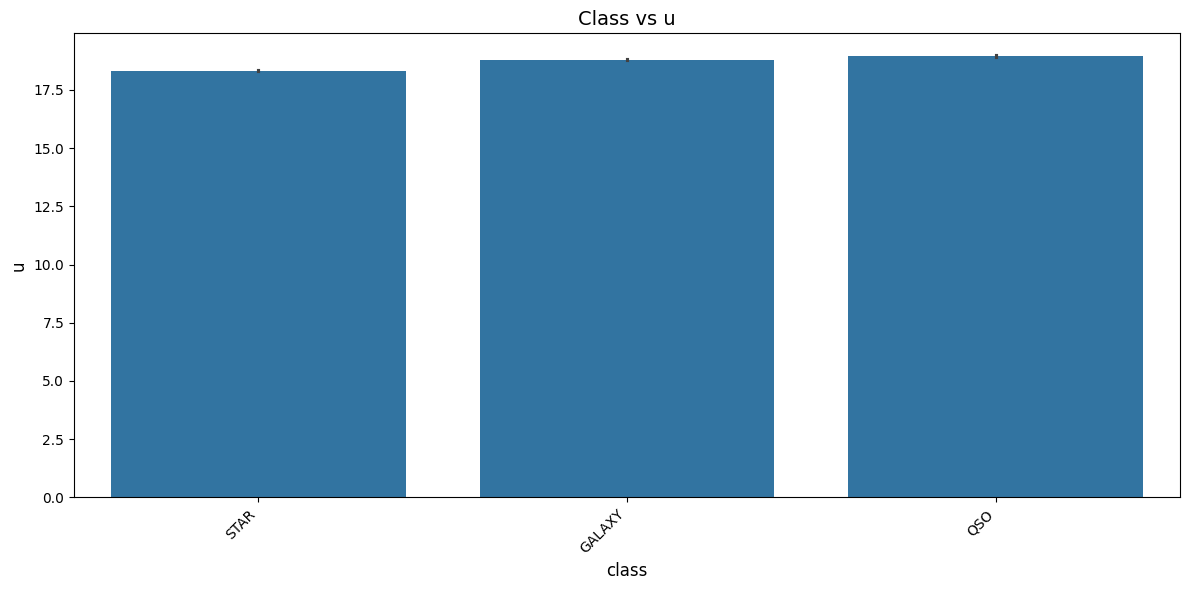

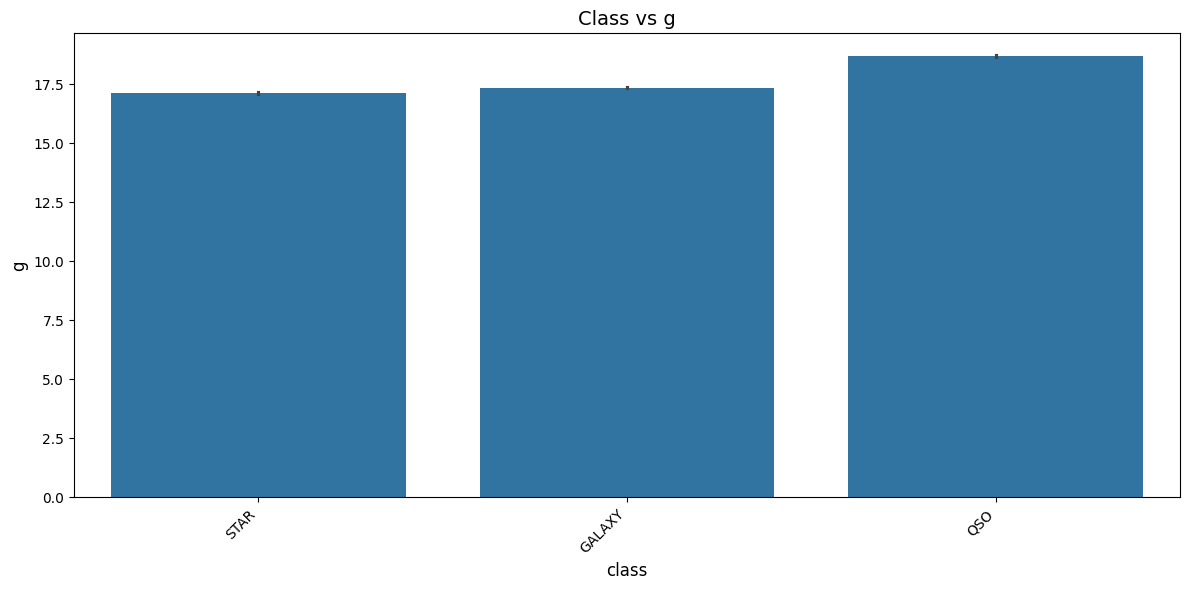

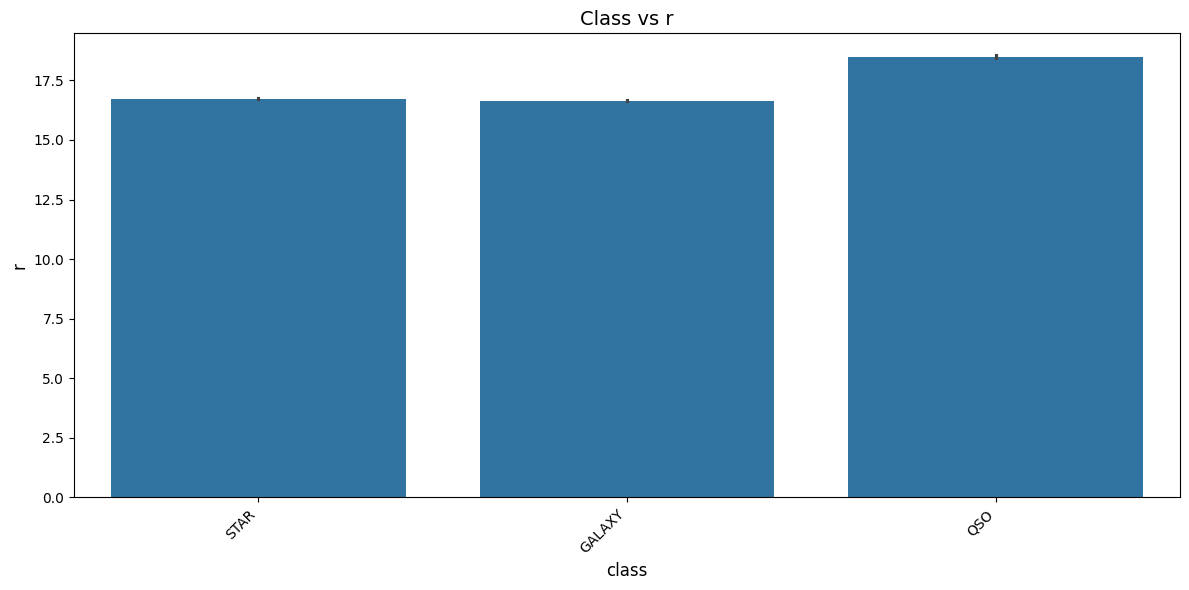

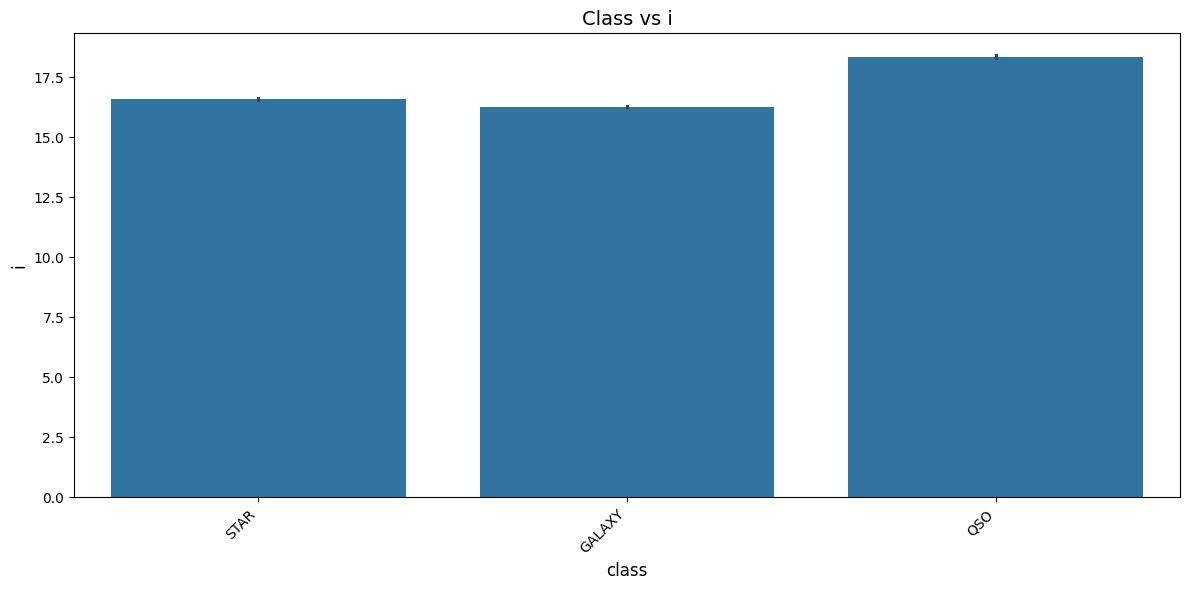

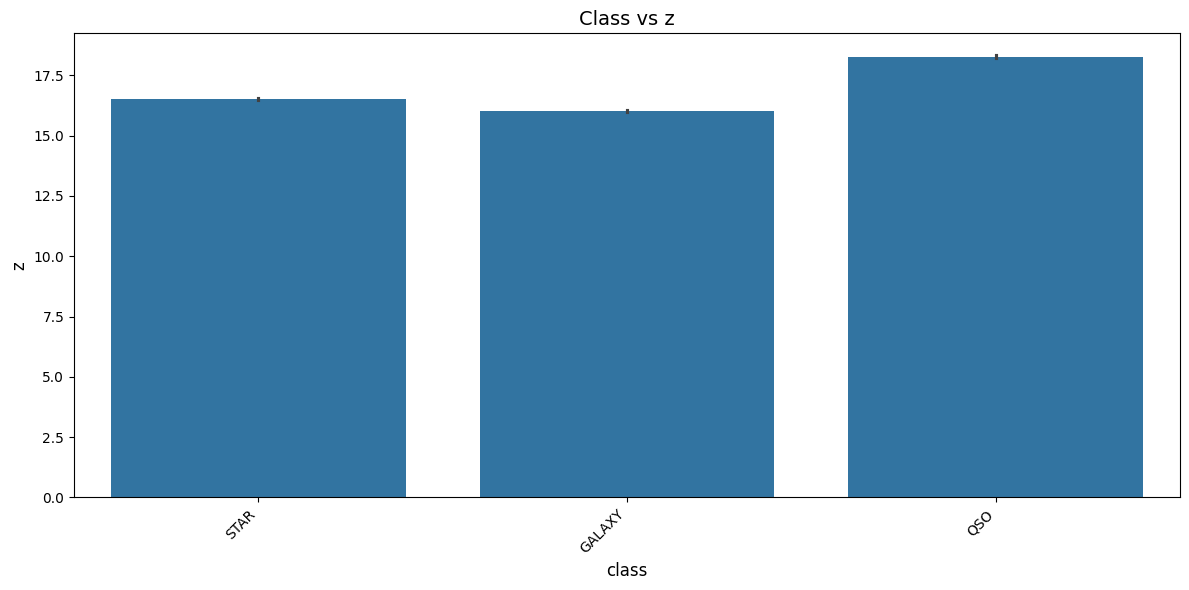

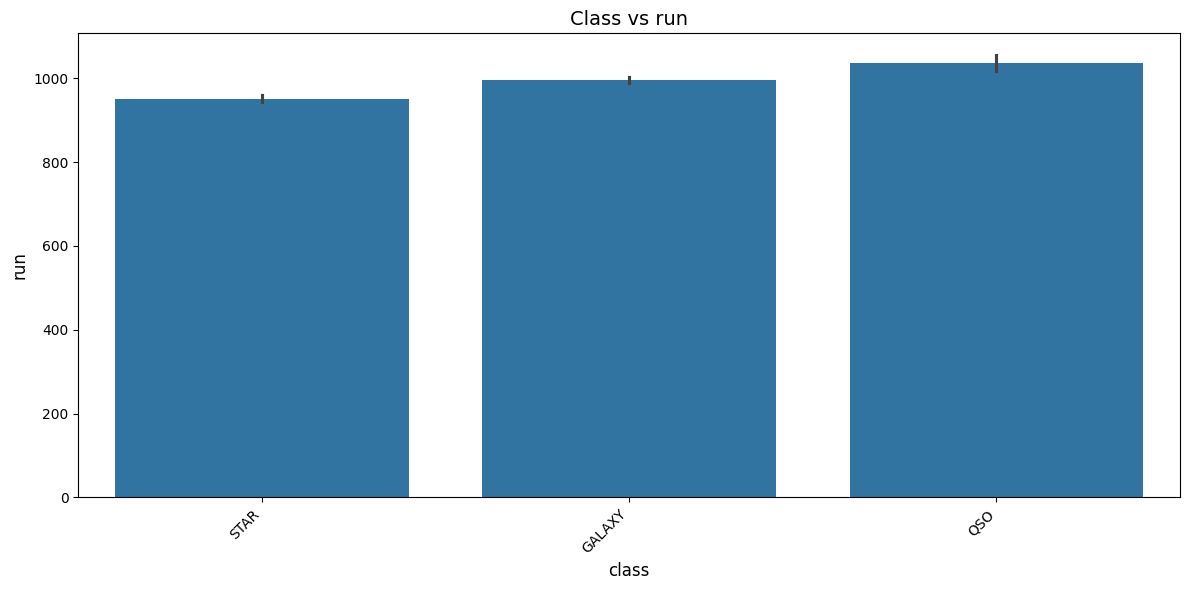

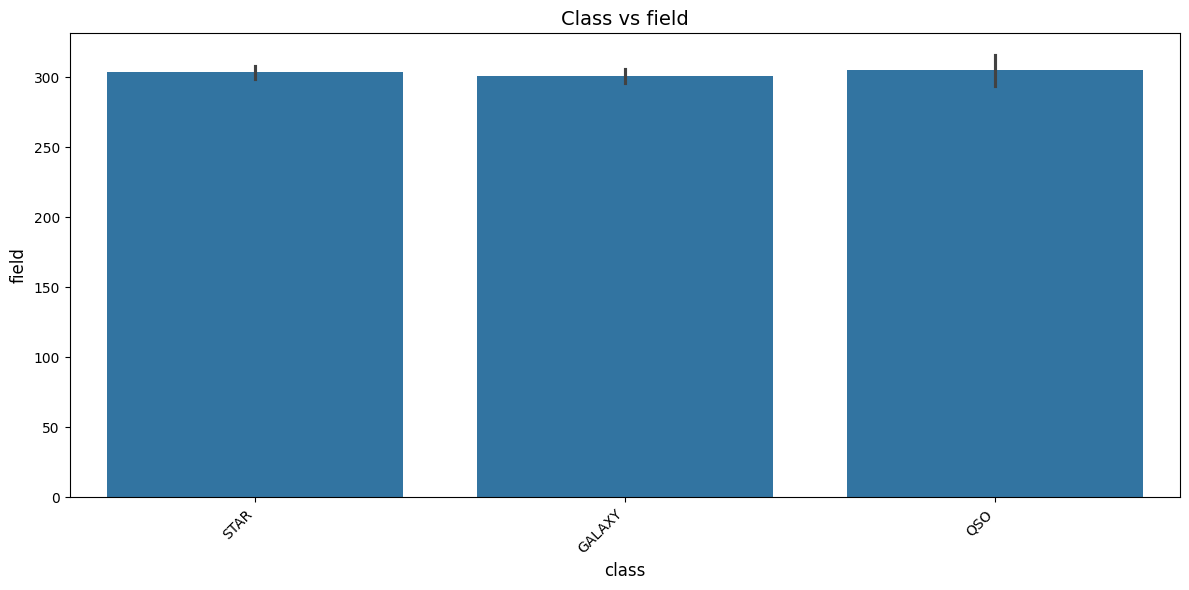

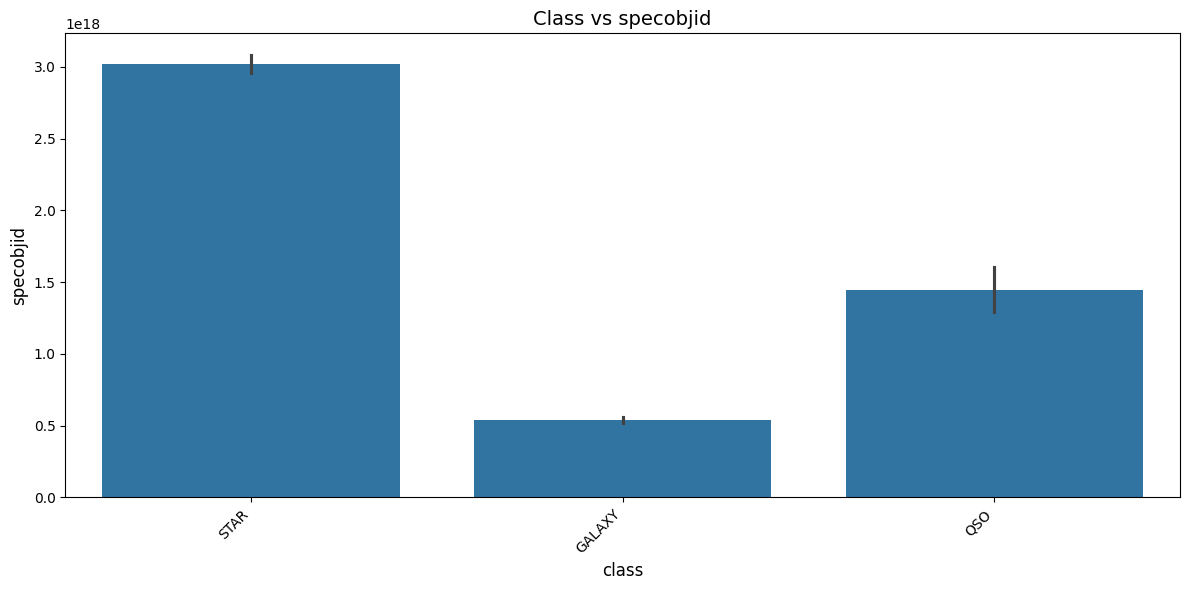

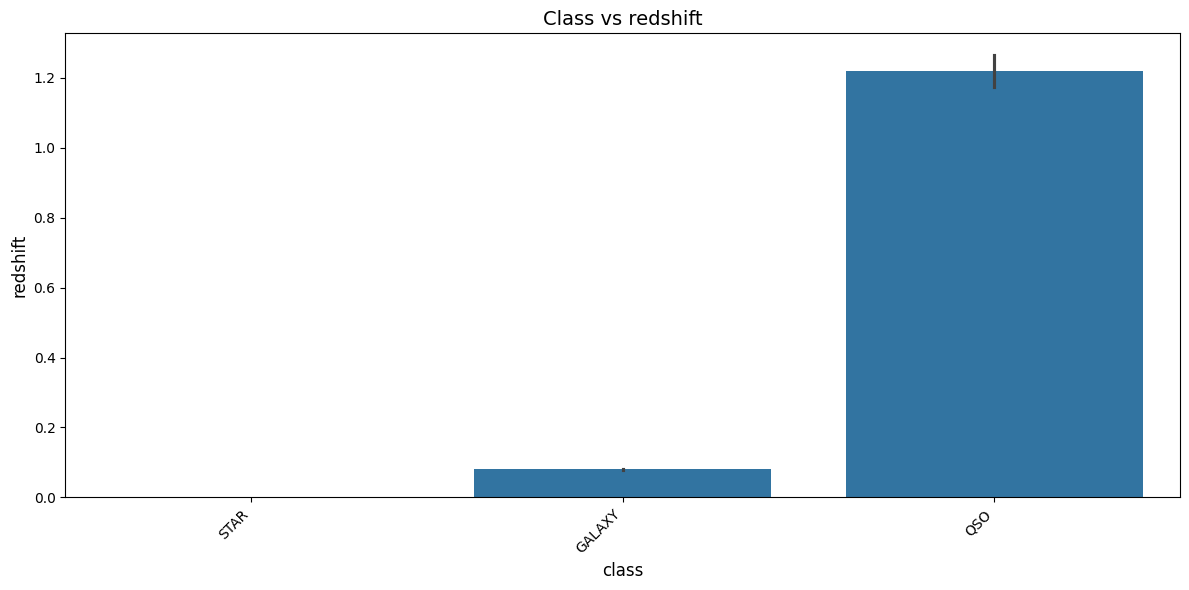

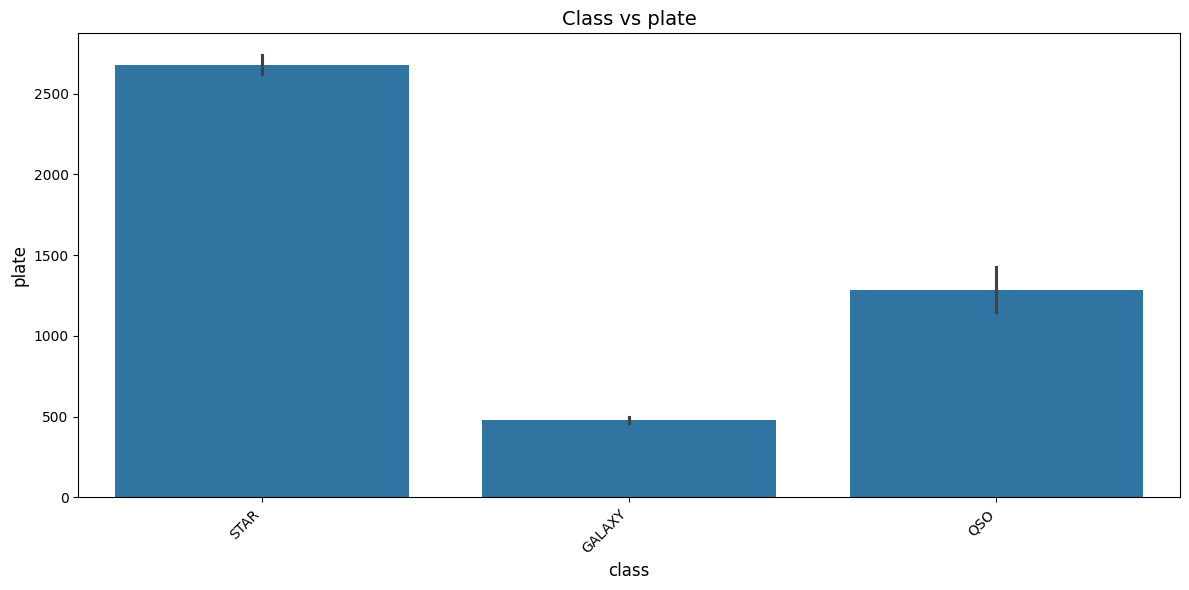

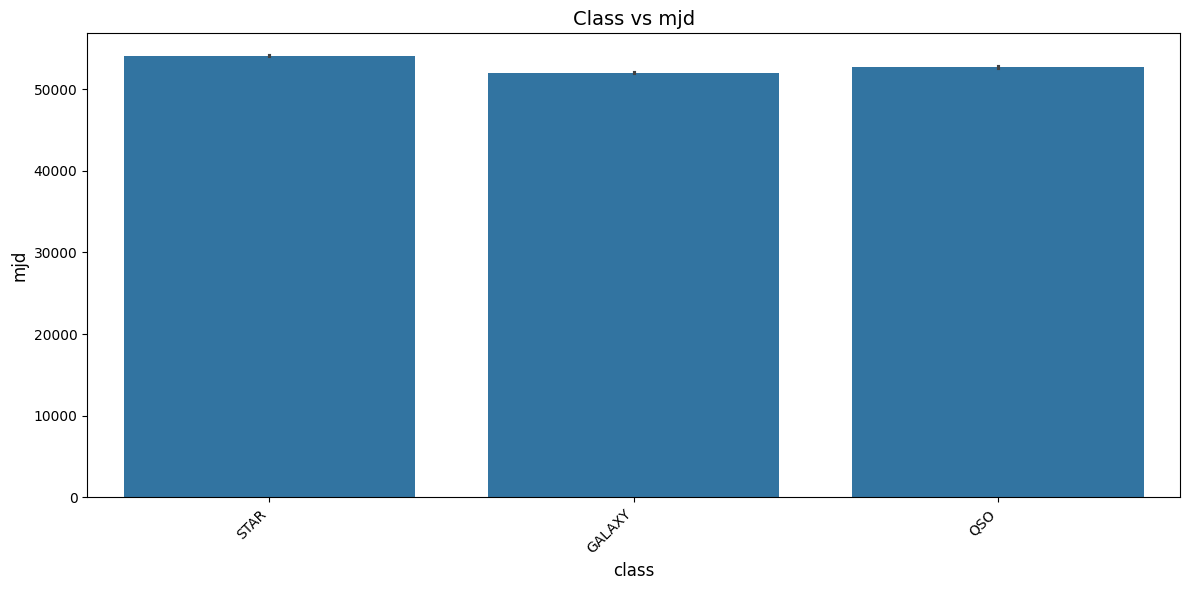

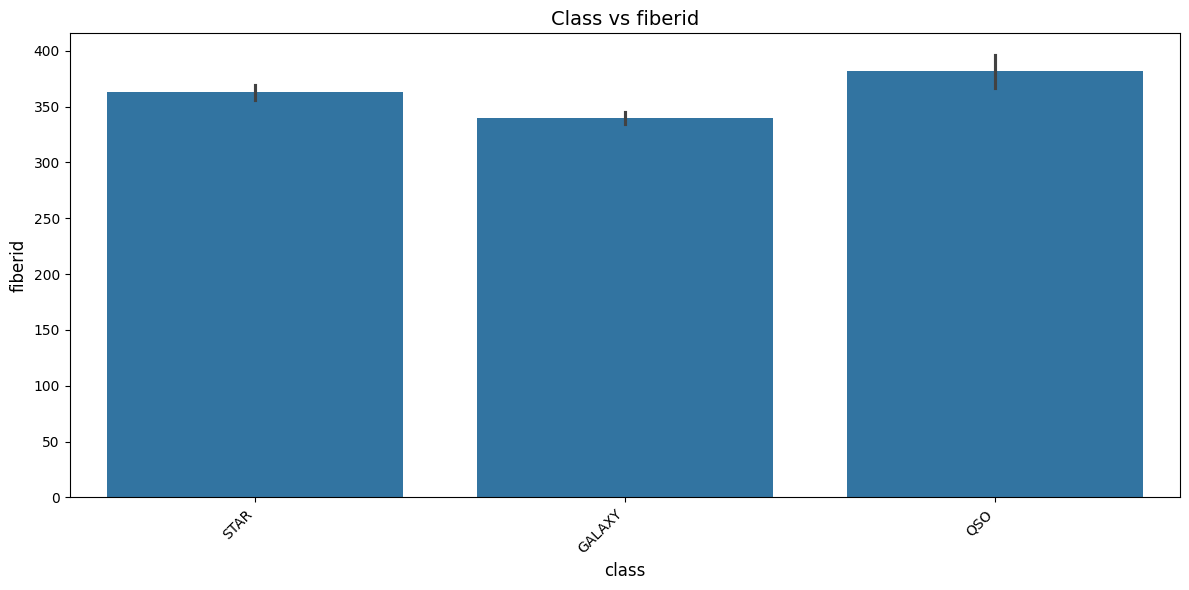

In [9]:
for col in num_cols:
    visualize_df.barplot_maker(df, "class", col, title=f"Class vs {col}")

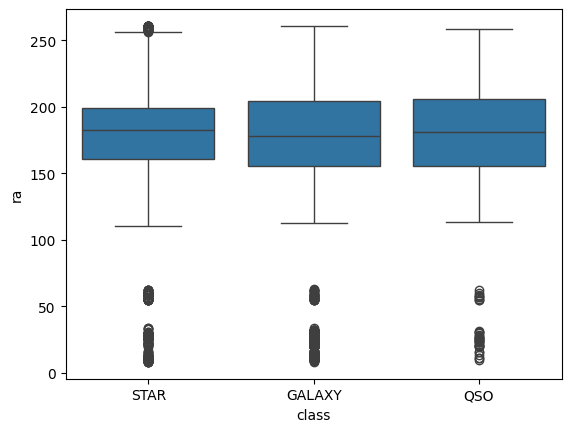

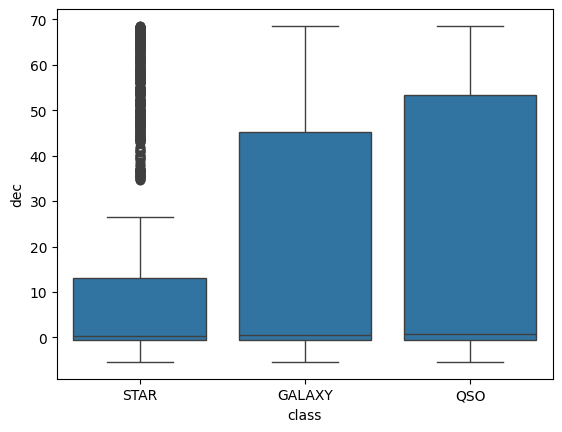

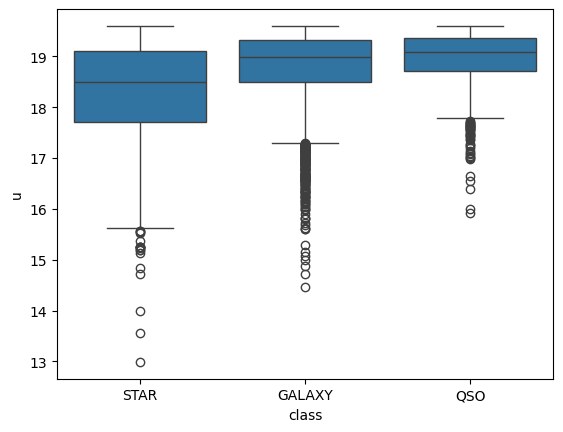

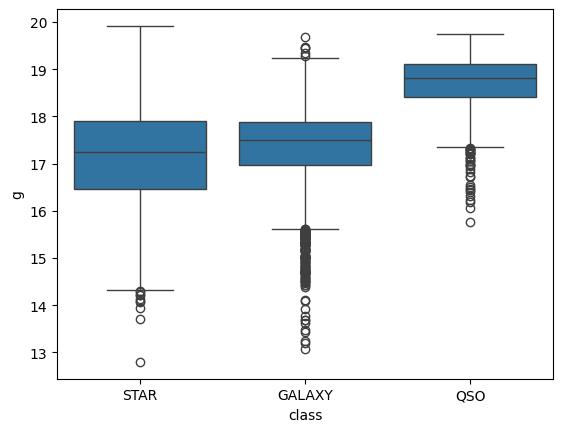

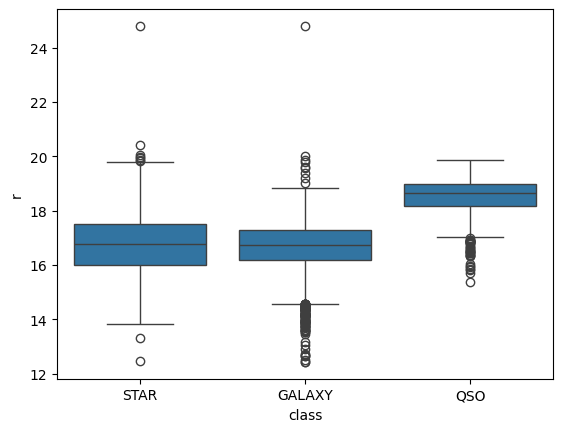

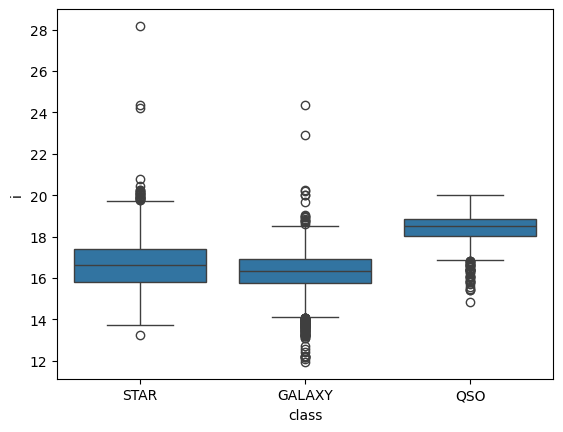

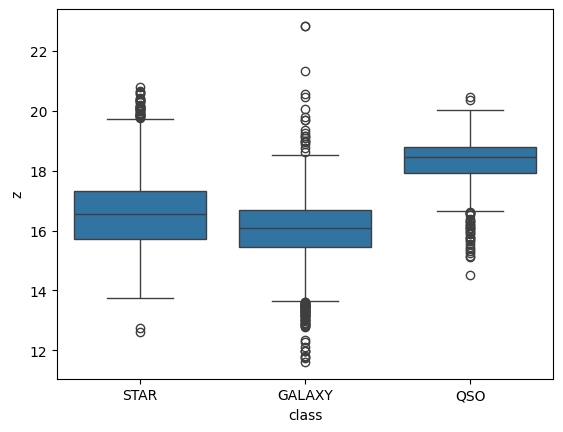

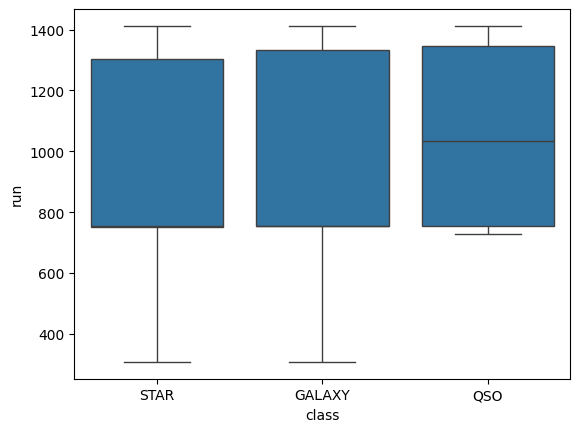

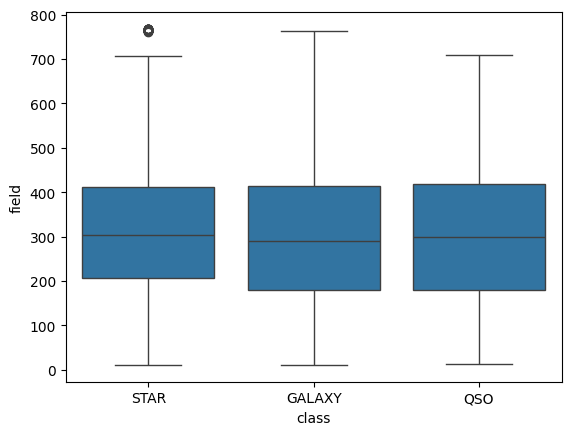

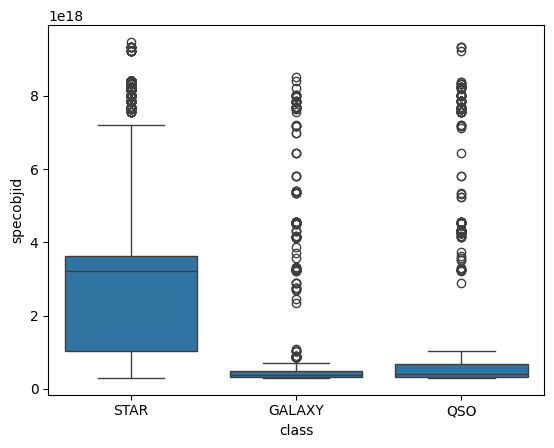

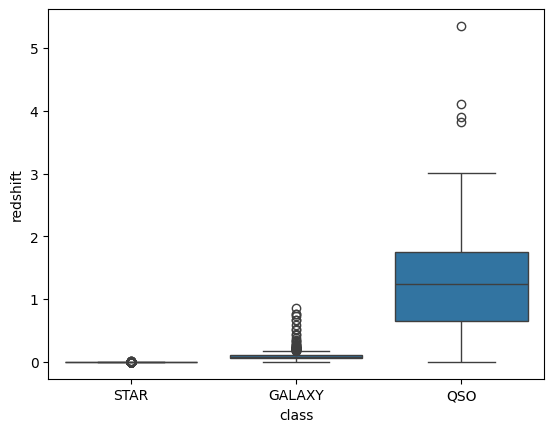

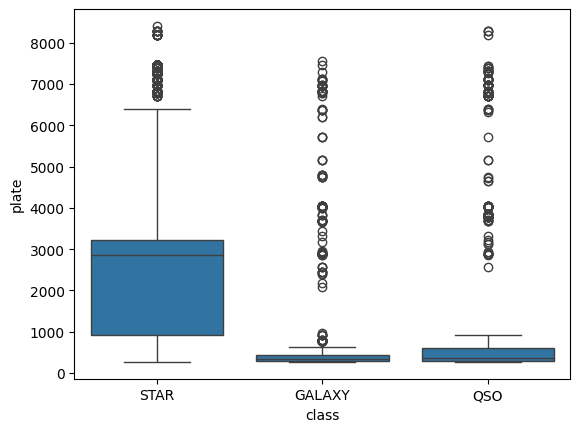

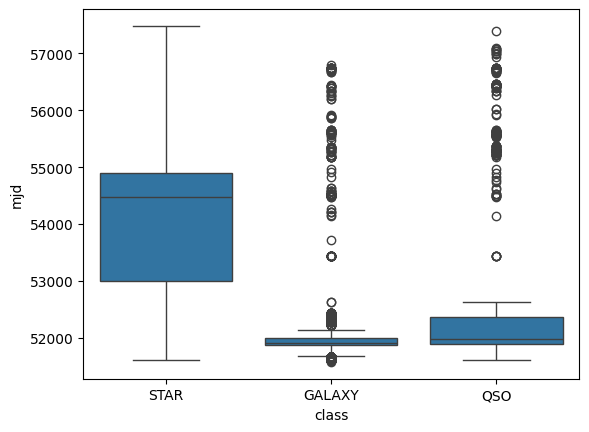

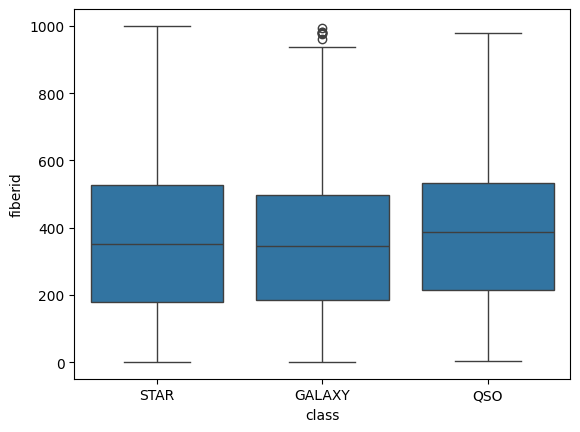

In [11]:
for col in num_cols:
    visualize_df.boxplot_maker(df, "class", col)

In [13]:
outlier_index = set()
for col in num_cols:
    outlier_index.update(preprocess_model.grab_outliers(df, col, index=True))

outlier_index_list = list(outlier_index)

            objid         ra        dec         u         g         r  \
941  1.237650e+18  21.100220  13.684072  18.45485  17.52891  17.22195   
942  1.237650e+18  21.099961  13.723728  19.49889  19.19319  18.75828   
943  1.237650e+18  21.250404  13.632007  17.42442  15.58155  14.66541   
944  1.237650e+18  21.313704  13.789749  17.30960  16.17659  16.04197   
945  1.237650e+18  21.261402  13.695422  18.84734  17.77303  17.32721   

            i         z   run  rerun  camcol  field     specobjid   class  \
941  17.09779  17.07846  1035    301       2    102  5.255970e+18    STAR   
942  18.56978  18.29636  1035    301       2    102  4.774080e+17     QSO   
943  14.41907  14.35144  1035    301       2    103  4.773960e+17    STAR   
944  16.03076  16.06882  1035    301       2    103  4.773980e+17    STAR   
945  17.01488  16.81846  1035    301       2    103  4.773960e+17  GALAXY   

     redshift  plate    mjd  fiberid  
941  0.000120   4668  56211      996  
942  0.255504    424

In [15]:
outliers = df.iloc[outlier_index_list, :]

In [16]:
outliers

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
8193,1.237650e+18,166.309499,1.152270,18.89481,18.85599,18.64174,18.59425,18.63919,756,301,6,337,3.130900e+17,QSO,1.448465,278,51900,327
15,1.237650e+18,184.350647,0.207230,18.73832,18.60962,18.39696,18.31174,17.97663,752,301,4,272,3.232950e+17,QSO,0.271937,287,52023,587
17,1.237650e+18,184.245664,0.198257,19.22143,19.30248,19.13823,19.11351,19.23454,752,301,4,272,3.232940e+17,QSO,1.178098,287,52023,583
22,1.237650e+18,184.654170,0.122673,19.07731,18.64518,18.49678,18.52677,18.45765,752,301,4,274,3.243750e+17,QSO,0.925173,288,52000,421
8229,1.237650e+18,168.333076,1.085822,19.04704,18.85318,18.78759,18.56929,18.57382,756,301,6,351,3.142250e+17,QSO,1.858931,279,51984,361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8144,1.237650e+18,184.662379,-1.026207,18.71628,18.41223,17.92588,17.64777,17.28087,756,301,1,460,3.243190e+17,QSO,0.257398,288,52000,217
8145,1.237650e+18,184.748871,-1.028918,19.23597,18.86397,18.82669,18.95709,18.87552,756,301,1,460,3.242960e+17,QSO,0.752658,288,52000,134
8148,1.237650e+18,184.918201,-1.002071,17.20012,16.89422,16.82726,16.63782,16.61124,756,301,1,461,3.242950e+17,QSO,1.576974,288,52000,131
8156,1.237650e+18,185.167687,-1.010762,16.12775,15.19004,14.87032,14.73055,14.68946,756,301,1,463,2.880130e+18,STAR,0.000288,2558,54140,297


In [17]:
for col in num_cols:
    preprocess_model.replace_with_thresholds(df, col)

In [19]:
for col in num_cols:
    print(f"{col} -> {preprocess_model.check_outlier(df, col)}")

ra -> False
dec -> False
u -> False
g -> False
r -> False
i -> False
z -> False
run -> False
field -> False
specobjid -> False
redshift -> False
plate -> False
mjd -> False
fiberid -> False


In [39]:
X = df.drop(["class", "objid", "rerun", "specobjid", "camcol", "field", "run"], axis=1)
y = df["class"]

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
for col in cat_cols:
    print(f"{col} -> {df[col].unique()}")

class -> ['STAR' 'GALAXY' 'QSO']
objid -> [1.23765e+18]
rerun -> [301]
camcol -> [4 2 1 5 6 3]


In [42]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
from xgboost import XGBClassifier

model = XGBClassifier()

model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [45]:
y_pred = model.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       996
           1       0.98      0.95      0.97       190
           2       0.99      1.00      1.00       814

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000

[[987   3   6]
 [  9 181   0]
 [  1   0 813]]


(0.9905, 0.9905, 0.9904744170199722, 0.9904596132358247, 0.9904617298773567)

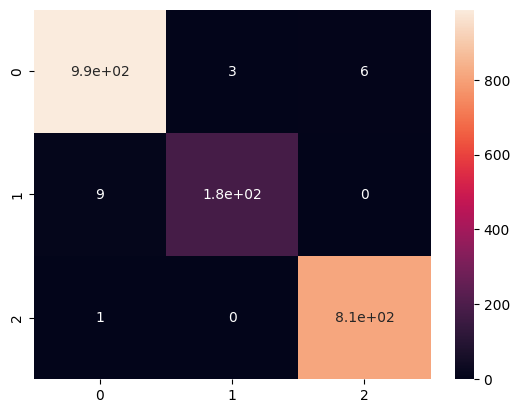

In [46]:
eval_model.eval_class_model(X_test_scaled, y_test, model, visualize=True)

In [47]:
eval_model.base_tree_models(X_test_scaled, y_test, scoring="accuracy")

Tree-based Classification Models...
accuracy: 0.977 (CART) 
accuracy: 0.9865 (RF) 
accuracy: 0.982 (AdaBoost) 
accuracy: 0.9865 (GBM) 
accuracy: 0.9885 (XGBoost) 


In [49]:
best_models = hp_tuning_model.hyperparameter_optimization(X_test_scaled, y_test)

Hyperparameter Optimization....
########## KNN ##########
roc_auc_ovr (Before): 0.9833
roc_auc_ovr (After): 0.9833
 KNN best params: {'n_neighbors': 26}

########## CART ##########
roc_auc_ovr (Before): 0.9871
roc_auc_ovr (After): 0.99
 CART best params: {'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_split': 25, 'splitter': 'random'}

########## RF ##########
roc_auc_ovr (Before): 0.9941
roc_auc_ovr (After): 0.9949
 RF best params: {'max_depth': 15, 'max_features': 5, 'min_samples_split': 15, 'n_estimators': 200}

########## XGBoost ##########
roc_auc_ovr (Before): 0.996


/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:53:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:53:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:53:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:53:43] WARNING: /Users/runn

roc_auc_ovr (After): 0.996
 XGBoost best params: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}

########## LightGBM ##########
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2616
[LightGBM] [Info] Number of data points in the train set: 1333, number of used features: 11
[LightGBM] [Info] Start training from score -0.696905
[LightGBM] [Info] Start training from score -2.358905
[LightGBM] [Info] Start training from score -0.898078
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 1334, number of used features: 11
[LightGBM] [Info] Start training from score -0.697655
[LightGBM] [Info] Start training from score -2.351750
[LightGBM] [Info] Start training from score -0.898828
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2616
[LightGBM] [Info] Number of data points in the train set: 1333, number of used features: 11
[LightGBM] [Info] Start training from score -0.696905
[LightGBM] [Info] Start training from score -2.358905
[LightGBM] [Info] Start training from score -0.898078
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 1334, number of used features: 11
[LightGBM] [Info] Start training from score -0.697655
[LightGBM] [Info] Start training from score -2.351750
[LightGBM] [Info] Start training from score -0.898828
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2616
[LightGBM] [Info] Number of data points in the train set: 1333, number of used features: 11
[LightGBM] [Info] Start training from score -0.696905
[LightGBM] [Info] Start training from score -2.358905
[LightGBM] [Info] Start training from score -0.898078
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2617
[LightGBM] [Info] Number of data points in the train set: 1333, number of used features: 11
[LightGBM] [Info] Start training from score -0.696905
[LightGBM] [Info] Start training from score -2.351000
[LightGBM] [Info] Start training from score -0.899921
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 1334, number of used features: 11
[LightGBM] [Info] Start training from score -0.697655
[LightGBM] [Info] Start training from score -2.351750
[LightGBM] [Info] Start training from score -0.898828
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [W

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 1334, number of used features: 11
[LightGBM] [Info] Start training from score -0.697655
[LightGBM] [Info] Start training from score -2.351750
[LightGBM] [Info] Start training from score -0.898828
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2707
[LightGBM] [Info] Number of data points in the train set: 2000, number of used features: 11
[LightGBM] [Info] Start training from score -0.697155
[LightGBM] [Info] Start training from score -2.353878
[LightGBM] [Info] Start training from score -0.898942
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [50]:
clf = hp_tuning_model.voting_classifier(best_models, X_test_scaled, y_test)

Voting Classifier...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2707
[LightGBM] [Info] Number of data points in the train set: 2000, number of used features: 11
[LightGBM] [Info] Start training from score -0.697155
[LightGBM] [Info] Start training from score -2.353878
[LightGBM] [Info] Start training from score -0.898942
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig